In [107]:
import pyccl as ccl

In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [132]:
sim_cls = np.load("sim_cls1024.npy")

In [133]:
l = np.arange(len(sim_cls))
ell = np.load("ell.npy")
cell = np.load("cell.npy")

Text(0, 0.5, 'angular power spectrum $C_l^{\\kappa\\kappa}$')

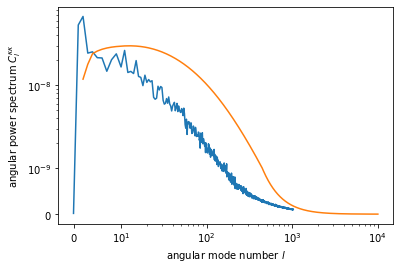

In [134]:
plt.plot(l, sim_cls)
plt.plot(ell, cell)
plt.xscale('symlog', linthresh=10, linscale=0.5, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.yscale('symlog', linthresh=1e-9, linscale=0.5, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.xlabel(r'angular mode number $l$')
plt.ylabel(r'angular power spectrum $C_l^{\kappa\kappa}$')

In [135]:
cosmo_cls=ccl.Cosmology(Omega_c=0.25, Omega_b=0.05,
                          h=0.7, sigma8=0.8, n_s=0.96, transfer_function='bbks',
                          mass_function='tinker',
                          matter_power_spectrum='linear')
theta_deg = np.logspace(0, 2, 1000) / 60
sim_xip = ccl.correlation(cosmo_cls, l, sim_cls, theta_deg, type='GG+', method='FFTLog')
ex_xip = ccl.correlation(cosmo_cls, ell, cell, theta_deg, type='GG+', method='FFTLog')

Text(0, 0.5, '$\\xi_+$')

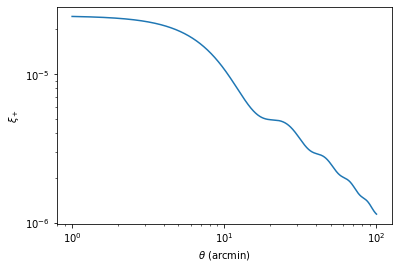

In [136]:
plt.plot(theta_deg * 60, sim_xip)
plt.loglog()
plt.xlabel("$\\theta$ (arcmin)")
plt.ylabel("$\\xi_+$")

Text(0, 0.5, '$\\xi_+$')

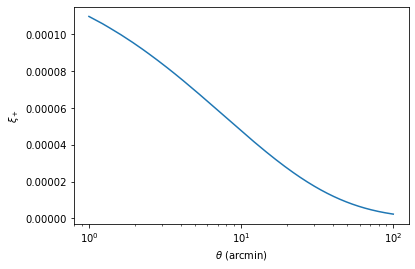

In [137]:
plt.plot(theta_deg * 60, ex_xip)
plt.semilogx()
plt.xlabel("$\\theta$ (arcmin)")
plt.ylabel("$\\xi_+$")

In [20]:
ccl.correlation?

Signature:
ccl.correlation(
    cosmo,
    ell,
    C_ell,
    theta,
    type='NN',
    corr_type=None,
    method='fftlog',
)
Docstring:
Compute the angular correlation function.

Args:
    cosmo (:class:`~pyccl.core.Cosmology`): A Cosmology object.
    ell (array_like): Multipoles corresponding to the input angular power
                      spectrum.
    C_ell (array_like): Input angular power spectrum.
    theta (float or array_like): Angular separation(s) at which to
                                 calculate the angular correlation
                                 function (in degrees).
    type (string): Type of correlation function. Choices:
                   'NN' (0x0), 'NG' (0x2),
                   'GG+' (2x2, xi+),
                   'GG-' (2x2, xi-), where numbers refer to the
                   spins of the two quantities being cross-correlated
                   (see Section 2.4.2 of the CCL paper).
    method (string, optional): Method to compute the correlation func